In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 518 kB/s 
     |████████████████████████████████| 453 kB 44.3 MB/s 


In [ ]:
# 형태소 분석기 사용법 https://mr-doosun.tistory.com/22
# from konlpy.tag import Twitter
from konlpy.tag import Okt

# twitter = Twitter()
okt = Okt()

# print(twitter.morphs(u'단독입찰보다 복수입찰의 경우'))
print(okt.morphs(u'단독입찰보다 복수입창의 경우'))


# print(twitter.nouns(u'유일하게 항공기 체계 종합개발 경험을 갖고 있는 KAI는'))
print(okt.nouns(u'유일하게 항공기 체계 종합개발 경험을 갖고 있는 KAI는'))


# print(twitter.phrases(u'날카로운 분석과 신뢰감 있는 진행으로'))
print(okt.phrases(u'날카로운 분석과 신뢰감 있는 진행으로'))


# print(twitter.pos(u'이것도 되나욬ㅋㅋ'))
print(okt.pos(u'이것도 되나욬ㅋㅋ'))


# print(twitter.pos(u'이것도 되나욬ㅋㅋ', norm=True))
print(okt.pos(u'이것도 되나욬ㅋㅋ', norm=True))


# print(twitter.pos(u'이것도 되나욬ㅋㅋ', norm=True, stem=True))
print(okt.pos(u'이것도 되나욬ㅋㅋ', norm=True, stem=True))

print(okt.pos("아버지가방에들어가신다",norm=True,stem=True))


['단독', '입찰', '보다', '복수', '입창', '의', '경우']
['항공기', '체계', '종합', '개발', '경험']
['날카로운 분석', '날카로운 분석과 신뢰감', '날카로운 분석과 신뢰감 있는 진행', '분석', '신뢰', '진행']
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나욬', 'Noun'), ('ㅋㅋ', 'KoreanParticle')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나요', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되다', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb')]


In [ ]:
import pandas as pd
data=pd.read_csv("senti_data_test.txt",sep="\t",encoding="utf-8")

In [ ]:
data.head()

,감정,문장
0,0,아 더빙 진짜 짜증나네요 목소리
1,1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2,0,너무재밓었다그래서보는것을추천한다
3,0,교도소 이야기구먼 솔직히 재미는 없다평점 조정
4,1,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...


In [ ]:
parsed_data=[]
for i in data["문장"]:
    parsed_data+=okt.pos(i,norm=True,stem=True)

In [ ]:
parsed_data

[('아', 'Exclamation'),
 ('더빙', 'Noun'),
 ('진짜', 'Noun'),
 ('짜증나다', 'Adjective'),
 ('목소리', 'Noun'),
 ('흠', 'Noun'),
 ('포스터', 'Noun'),
 ('보고', 'Noun'),
 ('초딩', 'Noun'),
 ('영화', 'Noun'),
 ('줄', 'Noun'),
 ('오버', 'Noun'),
 ('연기', 'Noun'),
 ('조차', 'Josa'),
 ('가볍다', 'Adjective'),
 ('않다', 'Verb'),
 ('너', 'Modifier'),
 ('무재', 'Noun'),
 ('밓었', 'Noun'),
 ('다그', 'Noun'),
 ('래서', 'Noun'),
 ('보다', 'Verb'),
 ('추천', 'Noun'),
 ('한', 'Josa'),
 ('다', 'Adverb'),
 ('교도소', 'Noun'),
 ('이야기', 'Noun'),
 ('구먼', 'Noun'),
 ('솔직하다', 'Adjective'),
 ('재미', 'Noun'),
 ('는', 'Josa'),
 ('없다', 'Adjective'),
 ('평점', 'Noun'),
 ('조정', 'Noun'),
 ('사이', 'Modifier'),
 ('몬페', 'Noun'),
 ('그', 'Determiner'),
 ('의', 'Noun'),
 ('익살스럽다', 'Adjective'),
 ('연기', 'Noun'),
 ('가', 'Josa'),
 ('돋보이다', 'Verb'),
 ('영화', 'Noun'),
 ('스파이더맨', 'Noun'),
 ('에서', 'Josa'),
 ('늙다', 'Verb'),
 ('보이다', 'Verb'),
 ('하다', 'Verb'),
 ('커스틴', 'Noun'),
 ('던스트', 'Noun'),
 ('가', 'Josa'),
 ('너무나도', 'Adverb'),
 ('이쁘다', 'Adjective'),
 ('보이다', 'Verb'),
 ('막', 'Noun')

In [ ]:
word_list = []
stopword = ["없다","있다","재밌다","좋다","최고","같다","이","것","진짜","아니다","이렇다","그냥","하나","다시","많다","이다","최악",'완전',"안되다",'어떻다',"정말","보고",'정도','역시']
for word,tag in parsed_data:
    if tag in ["Noun"] and len(word)>1 and word not in stopword:
        word_list.append(word)

In [ ]:
from collections import Counter
counts = Counter(word_list)
tags = counts.most_common(40)

In [ ]:
tags

[('영화', 7767),
 ('연기', 1004),
 ('평점', 976),
 ('스토리', 806),
 ('생각', 787),
 ('드라마', 776),
 ('사람', 751),
 ('감동', 747),
 ('감독', 651),
 ('재미', 646),
 ('배우', 618),
 ('시간', 605),
 ('내용', 559),
 ('쓰레기', 525),
 ('작품', 498),
 ('사랑', 448),
 ('마지막', 418),
 ('액션', 389),
 ('처음', 381),
 ('장면', 354),
 ('연출', 351),
 ('별로', 348),
 ('주인공', 347),
 ('느낌', 342),
 ('지금', 340),
 ('이야기', 335),
 ('명작', 321),
 ('이해', 263),
 ('이영화', 262),
 ('인생', 258),
 ('때문', 255),
 ('여자', 241),
 ('기억', 238),
 ('보기', 237),
 ('소재', 236),
 ('매력', 232),
 ('결말', 229),
 ('한번', 224),
 ('남자', 221),
 ('마음', 221)]

In [77]:
from tensorflow.keras.models import load_model
from konlpy.tag import Okt
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']
max_len = 42
loaded_model = load_model('LSTMGRU.h5')

with open("senti_tokenizer.pickle","rb") as fr:
    tokenizer = pickle.load(fr)
# loaded_model = load_model('LSTMGRU.h5')
okt=Okt()
def predict_text(text):
    new_text = okt.morphs(text, stem=True)
    new_text = [word for word in new_text if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_text])
    pad_encoded_text = pad_sequences(encoded,maxlen=max_len)
    score = float(loaded_model.predict(pad_encoded_text))
    return score

def predict_senti(text):
    idx2label={0:"부정",1:"긍정"}
    score_list=[]
    for i in text:
        score_list.append(idx2label[round(predict_text(i))])
    return score_list

def predict_senti2(text):
    idx2label={0:"부정",1:"긍정",-1:"중립"}
    score_list = []
    for i in text:
        score = predict_text(i)
        if score >= 0.7:
            label = 1
        elif score <= 0.3:
            label = 0
        else:
            label = -1
        score_list.append(idx2label[label])
    return score_list

In [89]:
from collections import Counter
def word_to_senticounter(word, data, neutral = True):
    filtered_data = data[data.str.contains(word)]
    if neutral:
        sentence_senti_predictlist = predict_senti2(filtered_data)
    else:
        sentence_senti_predictlist = predict_senti(filtered_data)
    counts = Counter(sentence_senti_predictlist)
    return counts

In [96]:
word_to_senticounter(tags[2][0],data["문장"].head(10000))

1/1 [==============================] - 0s 25ms/step


Counter({'부정': 208, '긍정': 113, '중립': 67})

In [98]:
counters = []
for word, _ in tags:
    counters.append(word_to_senticounter(word,data["문장"].head(10000)))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 35ms/step


In [99]:
counters

[Counter({'부정': 1338, '긍정': 1362, '중립': 478}),
 Counter({'부정': 207, '긍정': 275, '중립': 45}),
 Counter({'부정': 208, '긍정': 113, '중립': 67}),
 Counter({'부정': 217, '긍정': 100, '중립': 39}),
 Counter({'긍정': 172, '중립': 59, '부정': 108}),
 Counter({'부정': 114, '긍정': 158, '중립': 30}),
 Counter({'부정': 156, '긍정': 129, '중립': 43}),
 Counter({'부정': 51, '긍정': 236, '중립': 21}),
 Counter({'긍정': 73, '부정': 196, '중립': 31}),
 Counter({'부정': 413, '긍정': 297, '중립': 49}),
 Counter({'긍정': 144, '부정': 152, '중립': 38}),
 Counter({'부정': 190, '긍정': 48, '중립': 33}),
 Counter({'긍정': 62, '부정': 196, '중립': 24}),
 Counter({'부정': 186, '중립': 4, '긍정': 3}),
 Counter({'부정': 61, '긍정': 114, '중립': 34}),
 Counter({'긍정': 156, '부정': 37, '중립': 23}),
 Counter({'긍정': 108, '부정': 49, '중립': 16}),
 Counter({'부정': 86, '중립': 35, '긍정': 68}),
 Counter({'부정': 62, '긍정': 63, '중립': 21}),
 Counter({'긍정': 80, '부정': 58, '중립': 13}),
 Counter({'중립': 16, '긍정': 45, '부정': 104}),
 Counter({'부정': 123, '중립': 8, '긍정': 5}),
 Counter({'부정': 97, '긍정': 44, '중립': 18}),
 Counte

<BarContainer object of 3 artists>

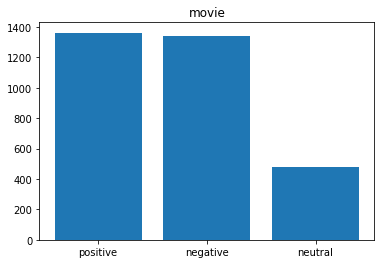

In [105]:
import matplotlib.pyplot as plt

counter1 = counters[0]
value=[counter1["긍정"],counter1["부정"],counter1["중립"]]
plt.title("movie")
plt.bar(["positive","negative","neutral"],value)

In [130]:
def set_word_color():
    senti_list = []
    for i in counters:
        if i["긍정"] + i["부정"] < i["중립"]:
            senti_list.append("중립")
        elif (i["긍정"]/i["부정"])>=1.25:
            senti_list.append("긍정")
        elif (i["부정"]/i["긍정"])>=1.25:
            senti_list.append("부정")
        else:
            senti_list.append("중립")
    return senti_list

In [131]:
senti_list = set_word_color()

In [146]:
aa=[]
for i, j in zip(tags,senti_list):
    print("단어 :",i[0])
    print("감정 :",j)
    aa.append([i[0],j])
    print("-----------------------")

단어 : 영화
감정 : 중립
-----------------------
단어 : 연기
감정 : 긍정
-----------------------
단어 : 평점
감정 : 부정
-----------------------
단어 : 스토리
감정 : 부정
-----------------------
단어 : 생각
감정 : 긍정
-----------------------
단어 : 드라마
감정 : 긍정
-----------------------
단어 : 사람
감정 : 중립
-----------------------
단어 : 감동
감정 : 긍정
-----------------------
단어 : 감독
감정 : 부정
-----------------------
단어 : 재미
감정 : 부정
-----------------------
단어 : 배우
감정 : 중립
-----------------------
단어 : 시간
감정 : 부정
-----------------------
단어 : 내용
감정 : 부정
-----------------------
단어 : 쓰레기
감정 : 부정
-----------------------
단어 : 작품
감정 : 긍정
-----------------------
단어 : 사랑
감정 : 긍정
-----------------------
단어 : 마지막
감정 : 긍정
-----------------------
단어 : 액션
감정 : 부정
-----------------------
단어 : 처음
감정 : 중립
-----------------------
단어 : 장면
감정 : 긍정
-----------------------
단어 : 연출
감정 : 부정
-----------------------
단어 : 별로
감정 : 부정
-----------------------
단어 : 주인공
감정 : 부정
-----------------------
단어 : 느낌
감정 : 부정
-----------------------
단어 : 지금
감정 : 긍정
-------------------

In [147]:
aa=dict(aa)

In [137]:
a=dict(tags)

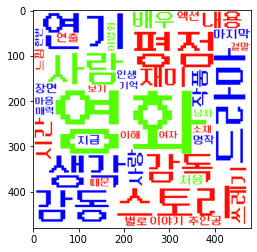

In [150]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    if aa[word]=="부정":
        return("hsl({:d},{:d}%, {:d}%)".format(3,100,50))
    elif aa[word]=="긍정":
        return("hsl({:d},{:d}%, {:d}%)".format(240,100,50))
    else:
        return("hsl({:d},{:d}%, {:d}%)".format(100,100,50))

from wordcloud import WordCloud, STOPWORDS

lightwordcloud = WordCloud(background_color='white', 
                      width=480, height=480, font_path='./DungGeunMo.ttf',
                     color_func = color_func).generate_from_frequencies(a)

plt.imshow(lightwordcloud)

In [152]:
data2=pd.read_csv("datatsv.csv",sep="\t",encoding="utf-8")

In [153]:
data2

,Unnamed: 0,title,etime,content,vote,comment
0,0,내가 이제 26살인데,방금,그동안 3천정도 모아둔 돈이 있는데 20대 초반을 보내면서 하고 싶은거 다해보면서...,0,1
1,1,치킨빼고 치즈볼만 먹고싶다,2분 전,ㅠㅅㅠ,0,0
2,2,지금 학교 다니는 남자 21학번은,2분 전,군대 안간거누,0,2
3,3,약대,3분 전,학부몇학번부터 생겼어?,0,0
4,4,낼 경영과 사회 ㄹㅅㅇ,3분 전,대면 맞지??,0,0
...,...,...,...,...,...,...
2435,2435,언교원 영어회화 들을만 할까요,41분 전,고민되네ㅠ,0,8
2436,2436,의치수약간 1학년으로 보내주면,41분 전,가니? 타전공생들만,0,12
2437,2437,5동 쓰레기장 진짜 누구냐,42분 전,짜장면 엎어놓고 튄거 싸대기 마렵네,1,0
2438,2438,복학생인데 공부해도 잘 모르겠다,43분 전,복학하니까 회계나 채권같이 계산하는건 감이 안잡힘 경상대는 시험 망치면 F주는곳 많음?,0,2


In [163]:
parsed_data=[]
for i in data2["title"]:
    parsed_data+=okt.pos(i,norm=True,stem=True)

word_list = []
stopword = ["없다","있다","재밌다","좋다","최고","같다","이","것","진짜","아니다","이렇다","그냥","하나","다시","많다","이다","최악",'완전',"안되다",'어떻다',"정말","보고",'정도','역시','내일','사람','이제']
for word,tag in parsed_data:
    if tag in ["Noun"] and len(word)>1 and word not in stopword:
        word_list.append(word)

from collections import Counter
counts = Counter(word_list)
tags = counts.most_common(40)

In [164]:
tags

[('교수', 289),
 ('신분', 183),
 ('학번', 122),
 ('사회', 122),
 ('공부', 122),
 ('쪽문', 122),
 ('영어', 122),
 ('생각', 122),
 ('개론', 119),
 ('전역', 114),
 ('랜소', 62),
 ('예행', 62),
 ('연습', 62),
 ('치킨', 61),
 ('치즈볼', 61),
 ('지금', 61),
 ('학교', 61),
 ('남자', 61),
 ('약대', 61),
 ('경영', 61),
 ('원가회계', 61),
 ('가치', 61),
 ('개인', 61),
 ('자유', 61),
 ('투자', 61),
 ('포기', 61),
 ('지갑', 61),
 ('붕어빵', 61),
 ('스타일', 61),
 ('행정학', 61),
 ('디자인', 61),
 ('생활', 61),
 ('여친', 61),
 ('구실', 61),
 ('도서관', 61),
 ('운동', 61),
 ('종목', 61),
 ('차이', 61),
 ('발음기호', 61),
 ('분리수거', 61)]

In [165]:
counters = []
for word, _ in tags:
    counters.append(word_to_senticounter(word,data2["title"]))

1/1 [==============================] - 0s 30ms/step


{'교수': '중립', '신분': '중립', '학번': '중립', '사회': '긍정', '공부': '부정', '쪽문': '중립', '영어': '중립', '생각': '중립', '개론': '중립', '전역': '긍정', '랜소': '중립', '예행': '중립', '연습': '중립', '치킨': '중립', '치즈볼': '중립', '지금': '중립', '학교': '중립', '남자': '중립', '약대': '중립', '경영': '긍정', '원가회계': '중립', '가치': '긍정', '개인': '긍정', '자유': '긍정', '투자': '부정', '포기': '부정', '지갑': '중립', '붕어빵': '중립', '스타일': '중립', '행정학': '중립', '디자인': '중립', '생활': '중립', '여친': '부정', '구실': '부정', '도서관': '중립', '운동': '중립', '종목': '중립', '차이': '중립', '발음기호': '중립', '분리수거': '중립'}


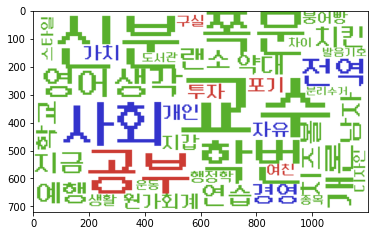

In [176]:
def counter_to_sentilist(counters):
    senti_list = []
    for i in counters:
        if i["긍정"] + i["부정"] < i["중립"]:
            senti_list.append("중립")
        elif (i["긍정"]/(i["부정"]+0.1))>=1.1:
            senti_list.append("긍정")
        elif (i["부정"]/(i["긍정"]+0.1))>=1.1:
            senti_list.append("부정")
        else:
            senti_list.append("중립")
    return senti_list

senti_list = counter_to_sentilist(counters)

word_to_senti = [ [i[0],j] for i,j in zip(tags,senti_list)]
word_to_senti = dict(word_to_senti)
word_frequency = dict(tags)

def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    if word_to_senti[word]=="부정":
        return("hsl({:d},{:d}%, {:d}%)".format(3,60,50))
    elif word_to_senti[word]=="긍정":
        return("hsl({:d},{:d}%, {:d}%)".format(240,60,50))
    else:
        return("hsl({:d},{:d}%, {:d}%)".format(100,60,43))

from wordcloud import WordCloud

lightwordcloud = WordCloud(background_color='white', 
                      width=1200, height=720, font_path='./DungGeunMo.ttf',
                     color_func = color_func).generate_from_frequencies(word_frequency)

plt.imshow(lightwordcloud)
print(word_to_senti)

In [180]:
counts.keys()

dict_keys(['치킨', '치즈볼', '지금', '학교', '남자', '학번', '약대', '경영', '사회', '원가회계', '공부', '신분', '가치', '개인', '자유', '투자', '교수', '포기', '쪽문', '지갑', '붕어빵', '스타일', '행정학', '개론', '디자인', '생활', '랜소', '예행', '연습', '전역', '여친', '구실', '도서관', '운동', '종목', '차이', '영어', '발음기호', '분리수거', '티빙', '자리', '배우', '김유정', '생각', '우리', '라인', '교원', '회화', '의치', '약간', '학년', '쓰레기', '누구', '복학생', '작년', '생화학', '법학', '마케팅관리', '시험', '전날', '교양', '이성', '플러스', '점수', '정통'])

In [181]:
counts.values()

dict_values([61, 61, 61, 61, 61, 122, 61, 61, 122, 61, 122, 183, 61, 61, 61, 61, 289, 61, 122, 61, 61, 61, 61, 119, 61, 61, 62, 62, 62, 114, 61, 61, 61, 61, 61, 61, 122, 61, 61, 61, 61, 61, 61, 122, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 58, 48, 61, 43, 43, 53, 53, 53, 3])

In [183]:
word_df = pd.DataFrame(zip(counts.keys(),counts.values()))

In [185]:
word_df.columns = ["단어","빈도"]

In [186]:
word_df

,단어,빈도
0,치킨,61
1,치즈볼,61
2,지금,61
3,학교,61
4,남자,61
...,...,...
60,교양,43
61,이성,53
62,플러스,53
63,점수,53


In [191]:

tempdict = {}
for i,j in zip(counters,tags):
    dic= {"긍정":0,"부정":0,"중립":0}
    for key in i.keys():
        dic[key]=i[key]
    tempdict[j[0]] = dic

In [192]:
tempdict

{'교수': {'긍정': 0, '부정': 61, '중립': 228},
 '신분': {'긍정': 0, '부정': 0, '중립': 183},
 '학번': {'긍정': 0, '부정': 0, '중립': 122},
 '사회': {'긍정': 122, '부정': 0, '중립': 0},
 '공부': {'긍정': 0, '부정': 61, '중립': 61},
 '쪽문': {'긍정': 0, '부정': 0, '중립': 122},
 '영어': {'긍정': 0, '부정': 0, '중립': 122},
 '생각': {'긍정': 0, '부정': 0, '중립': 122},
 '개론': {'긍정': 0, '부정': 0, '중립': 119},
 '전역': {'긍정': 61, '부정': 0, '중립': 53},
 '랜소': {'긍정': 0, '부정': 0, '중립': 62},
 '예행': {'긍정': 0, '부정': 0, '중립': 62},
 '연습': {'긍정': 0, '부정': 0, '중립': 62},
 '치킨': {'긍정': 0, '부정': 0, '중립': 61},
 '치즈볼': {'긍정': 0, '부정': 0, '중립': 61},
 '지금': {'긍정': 0, '부정': 0, '중립': 61},
 '학교': {'긍정': 0, '부정': 0, '중립': 61},
 '남자': {'긍정': 0, '부정': 0, '중립': 61},
 '약대': {'긍정': 0, '부정': 0, '중립': 61},
 '경영': {'긍정': 61, '부정': 0, '중립': 0},
 '원가회계': {'긍정': 0, '부정': 0, '중립': 61},
 '가치': {'긍정': 61, '부정': 0, '중립': 0},
 '개인': {'긍정': 61, '부정': 0, '중립': 0},
 '자유': {'긍정': 61, '부정': 0, '중립': 0},
 '투자': {'긍정': 0, '부정': 61, '중립': 0},
 '포기': {'긍정': 0, '부정': 61, '중립': 0},
 '지갑': {'긍정': 0, '부정': 0

In [197]:
wdf = pd.DataFrame(tempdict)
wdf = wdf.T
wdf['단어'] = wdf.index

In [199]:
wdf.head(4)

,긍정,부정,중립,단어
교수,0,61,228,교수
신분,0,0,183,신분
학번,0,0,122,학번
사회,122,0,0,사회


In [201]:
worddataframe = pd.merge(word_df,wdf,how='inner')

In [202]:
worddataframe.to_csv("word_frequency_senti.csv",sep="\t")